In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
lamarck = pd.read_csv("./Lamarck_rawdata.csv", header=0, index_col=[0,1])
print(lamarck)

path="/Users/meijiaojiao/Desktop/Evolution_algorithm/Experiment10/SSGA/SSGA_rawdata.csv"
SSGA = pd.read_csv(path,header=0,index_col=[0,1])
print(SSGA.shape)

path="/Users/meijiaojiao/Desktop/Evolution_algorithm/Experiment10/Baldwin/Baldwin_rawdata.csv"
baldwin = pd.read_csv(path,header=0,index_col=[0,1])
print(baldwin.shape)

df_together = pd.concat([lamarck,SSGA,baldwin],axis=0,keys=["Lamarck","SSGA","Baldwin"])
# df_together = pd.concat([lamarck,SSGA],axis=0,keys=["Lamarck","SSGA"])
print(df_together.shape)
df_together = df_together.applymap(lambda x:x if not '%' in str(x) else x.replace('%',''))
print(df_together.dtypes)

                   590        593        579        588        589        591  \
F1  Times1    0.496340   0.441634   0.498842   0.490256   0.470203   0.497210   
    Times2    0.492312   0.495183   0.497568   0.490584   0.480355   0.493420   
    Times3    0.495637   0.474899   0.471217   0.476186   0.484068   0.491154   
    Times4    0.499985   0.497061   0.494971   0.499870   0.486204   0.429060   
    Times5    0.484396   0.474193   0.461035   0.494331   0.497765   0.499797   
...                ...        ...        ...        ...        ...        ...   
F23 Times6  -10.536280 -10.536261 -10.536251 -10.536338 -10.536293 -10.536305   
    Times7  -10.536375 -10.536362 -10.536335 -10.536277 -10.536295 -10.536283   
    Times8  -10.536288 -10.536312 -10.536312 -10.536276 -10.536290 -10.536272   
    Times9  -10.536288  -5.128481 -10.536363 -10.536327 -10.536390 -10.536399   
    Times10 -10.536259 -10.536260 -10.536277 -10.536272 -10.536276 -10.536319   

                   576     

Lamarck  F1   Times1   590     0.496340
                       593     0.441634
                       579     0.498842
                       588     0.490256
                       589     0.470203
                                ...    
Baldwin  F23  Times10  562    -5.175647
                       575   -10.536269
                       573   -10.536258
                       552   -10.536265
                       555   -10.536279
Length: 13800, dtype: float64

,Function,Combinations,Mode,Times,solutions
0,F1,590,Lamarck,Times1,0.496340
1,F1,593,Lamarck,Times1,0.441634
2,F1,579,Lamarck,Times1,0.498842
3,F1,588,Lamarck,Times1,0.490256
4,F1,589,Lamarck,Times1,0.470203
...,...,...,...,...,...
13795,F23,562,Baldwin,Times10,-5.175647
13796,F23,575,Baldwin,Times10,-10.536269
13797,F23,573,Baldwin,Times10,-10.536258
13798,F23,552,Baldwin,Times10,-10.536265


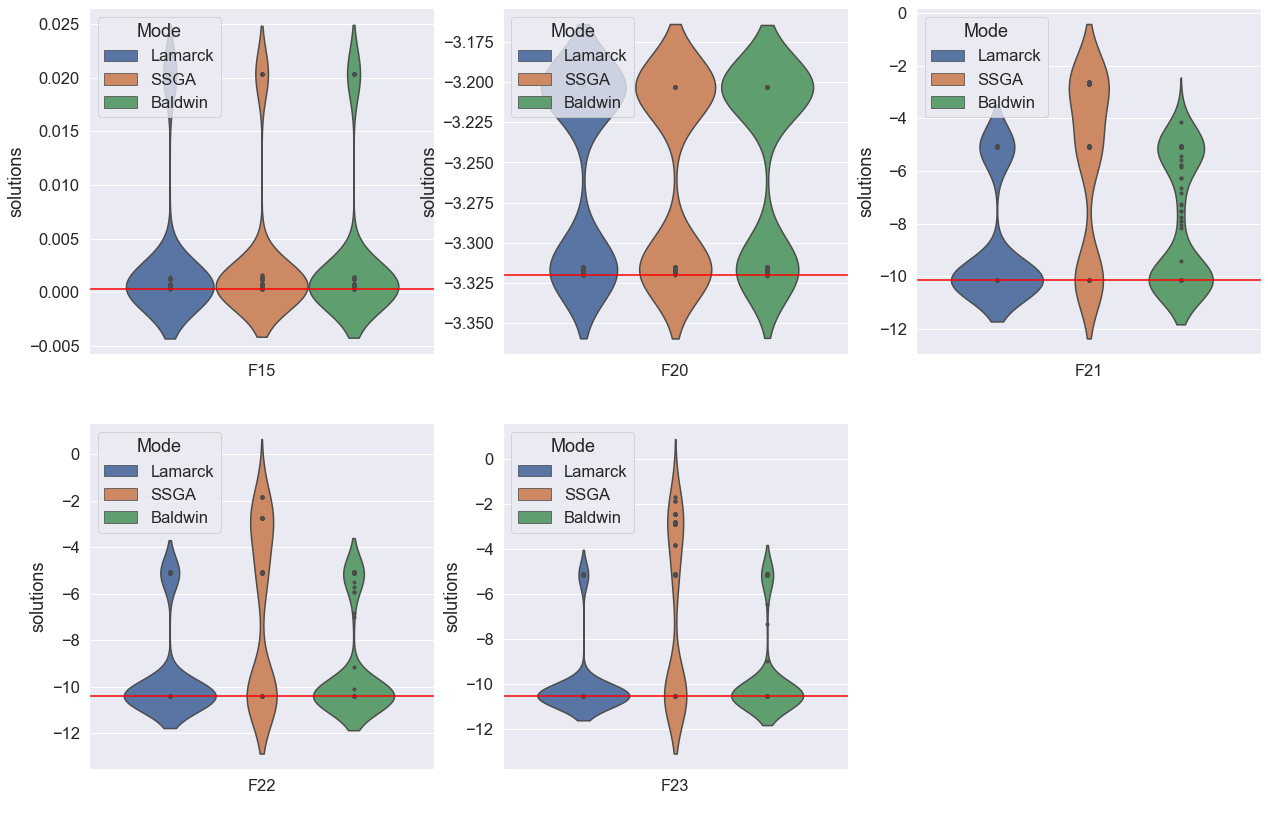

In [7]:
import seaborn as sns
dataframe = df_together
dataframe = dataframe.stack()
display(dataframe)
dataframe = dataframe.rename_axis(index=["Mode","Function","Times","Combinations"])
dataframe = dataframe.reset_index(level=[0, 2], name="solutions")
dataframe["solutions"] = dataframe["solutions"].replace("NAN", 0)
dataframe["solutions"] = pd.to_numeric(dataframe["solutions"])
dataframe = dataframe.reset_index(drop=False)
display(dataframe)
function_list = ["F" + str(i) for i in [15,20,21,22,23]]
# opt = [0, 0, 0, 0, 0, 0, 0, -20949, 0, 0, 0, 0, 0, 1, 0.0003, -1.0316, 0.398, 3, -3.86, -3.32,-10.1532, -10.4028, -10.5363]
opt = [ 0.0003, -3.32,-10.1532, -10.4028, -10.5363]
def show_graph(dataframe):
    sns.set(font_scale=1.5)
    dist_cols = 3
    dist_rows = 2
    plt.figure(figsize=(7 * dist_cols, 7 * dist_rows))
    i = 1
    for function in function_list:
        dataf = dataframe[dataframe["Function"] == function]
        # data = dataf[dataf["Times"] == ("Mean")]
        plt.subplot(dist_rows, dist_cols, i)
        ax = sns.violinplot(data=dataf, y="solutions",x="Function",hue="Mode",inner="points")
        # sns.scatterplot(data=dataf, y="solutions",palette="viridis",x="Function",hue="Mode")
        # ax= sns.boxplot(data=dataf, y="solutions",x="Function",hue="Mode",width=0.15)
        # ax= sns.swarmplot(data=dataf, y="solutions",x="Function",hue="Mode")
        sns.move_legend(ax, "upper left", bbox_to_anchor=(0, 1))
        plt.axhline(y=opt[i-1],color="red")
        plt.xlabel(" ")
        # sns.violinplot(data=dataf, y="solutions",x="Function",hue="Mode")
        # plt.title(f"Optimal:{opt[i-1]}")
        # plt.title(f"Optimal:{opt[i-1]}")
        # ax.set_yticklabels(ax.get_yticks(), size = 20)
        plt.ylabel("solutions")
        i = i + 1
    plt.savefig("./together_solutions_12{0}.png".format("lamarck_SSGA_Baldwin"), dpi=1200, bbox_inches='tight')
    plt.show()
show_graph(dataframe=dataframe)

Lamarck  F1   Times1   590     0.496340
                       593     0.441634
                       579     0.498842
                       588     0.490256
                       589     0.470203
                                ...    
Baldwin  F23  Times10  562    -5.175647
                       575   -10.536269
                       573   -10.536258
                       552   -10.536265
                       555   -10.536279
Length: 13800, dtype: float64

,Function,Combinations,Mode,Times,solutions
0,F1,590,Lamarck,Times1,0.496340
1,F1,593,Lamarck,Times1,0.441634
2,F1,579,Lamarck,Times1,0.498842
3,F1,588,Lamarck,Times1,0.490256
4,F1,589,Lamarck,Times1,0.470203
...,...,...,...,...,...
13795,F23,562,Baldwin,Times10,-5.175647
13796,F23,575,Baldwin,Times10,-10.536269
13797,F23,573,Baldwin,Times10,-10.536258
13798,F23,552,Baldwin,Times10,-10.536265


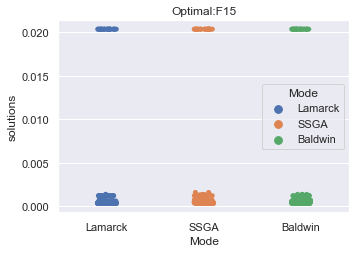

In [8]:
import seaborn as sns
dataframe = df_together
dataframe = dataframe.stack()
display(dataframe)
dataframe = dataframe.rename_axis(index=["Mode","Function","Times","Combinations"])
dataframe = dataframe.reset_index(level=[0, 2], name="solutions")
dataframe["solutions"] = pd.to_numeric(dataframe["solutions"])
dataframe = dataframe.reset_index(drop=False)
display(dataframe)
function_list = ["F" + str(i) for i in range(1, 24, 1)]
opt = [0, 0, 0, 0, 0, 0, 0, -20949, 0, 0, 0, 0, 0, 1, 0.0003, -1.0316, 0.398, 3, -3.86, -3.32,-10.1532, -10.4028, -10.5363]
def show_graph(dataframe):
    sns.set()
    dist_cols = 4
    dist_rows = 3
    plt.figure(figsize=(6 * dist_cols, 4 * dist_rows))
    i = 1
    for function in function_list[14:15]:
        dataf = dataframe[dataframe["Function"] == function]
        # data = dataf[dataf["Times"] == ("Mean" or "Min")]
        plt.subplot(dist_rows, dist_cols, i)
        # sns.violinplot(data=dataf, y="solutions",palette="viridis",x="Function",hue="Mode",split=True,inner="stick")
        sns.stripplot(data=dataf, y="solutions",x="Mode",hue="Mode")
        # plt.axhline(y=opt[i-1],color="red")
        # sns.violinplot(data=dataf, y="solutions",x="Function",hue="Mode")
        # plt.title(f"Optimal:{opt[i-1]}")
        plt.title(f"Optimal:{function}")
        # ax.set_yticklabels(ax.get_yticks(), size = 20)
        plt.ylabel("solutions")
        i = i + 1
    plt.savefig("./together_solutions_12{0}.png".format("lamarck_SSGA_Baldwin"), dpi=1200, bbox_inches='tight')
    plt.show()
show_graph(dataframe=dataframe)

In [9]:
global_opt = [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, -20949.5, 0.5, 0.5, 0.5, 0.5, 0.5, 1.5, 0.00034, -1.03155, 0.3985, 3.5, -3.855, -3.315,
                    -10.15315, -10.40275, -10.53625]
df_opt = dataframe.copy()
cdf=[]
for f in range(1,24,1):
    opt = global_opt[f-1]
    f = "F"+str(f)
    dataf = df_opt[df_opt["Function"] == f]
    dataf["solutions"] = opt
    cdf.append(dataf)
cdf = pd.concat(cdf,axis=0)
cdf.rename(columns={'solutions': 'optimal'}, inplace=True)
print(cdf)

      Function Combinations     Mode    Times   optimal
0           F1          590  Lamarck   Times1   0.50000
1           F1          593  Lamarck   Times1   0.50000
2           F1          579  Lamarck   Times1   0.50000
3           F1          588  Lamarck   Times1   0.50000
4           F1          589  Lamarck   Times1   0.50000
...        ...          ...      ...      ...       ...
13795      F23          562  Baldwin  Times10 -10.53625
13796      F23          575  Baldwin  Times10 -10.53625
13797      F23          573  Baldwin  Times10 -10.53625
13798      F23          552  Baldwin  Times10 -10.53625
13799      F23          555  Baldwin  Times10 -10.53625

[13800 rows x 5 columns]


/var/folders/vb/bhfltf7s0n5dmrcb5r9s80mw0000gn/T/ipykernel_7503/510697188.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataf["solutions"] = opt


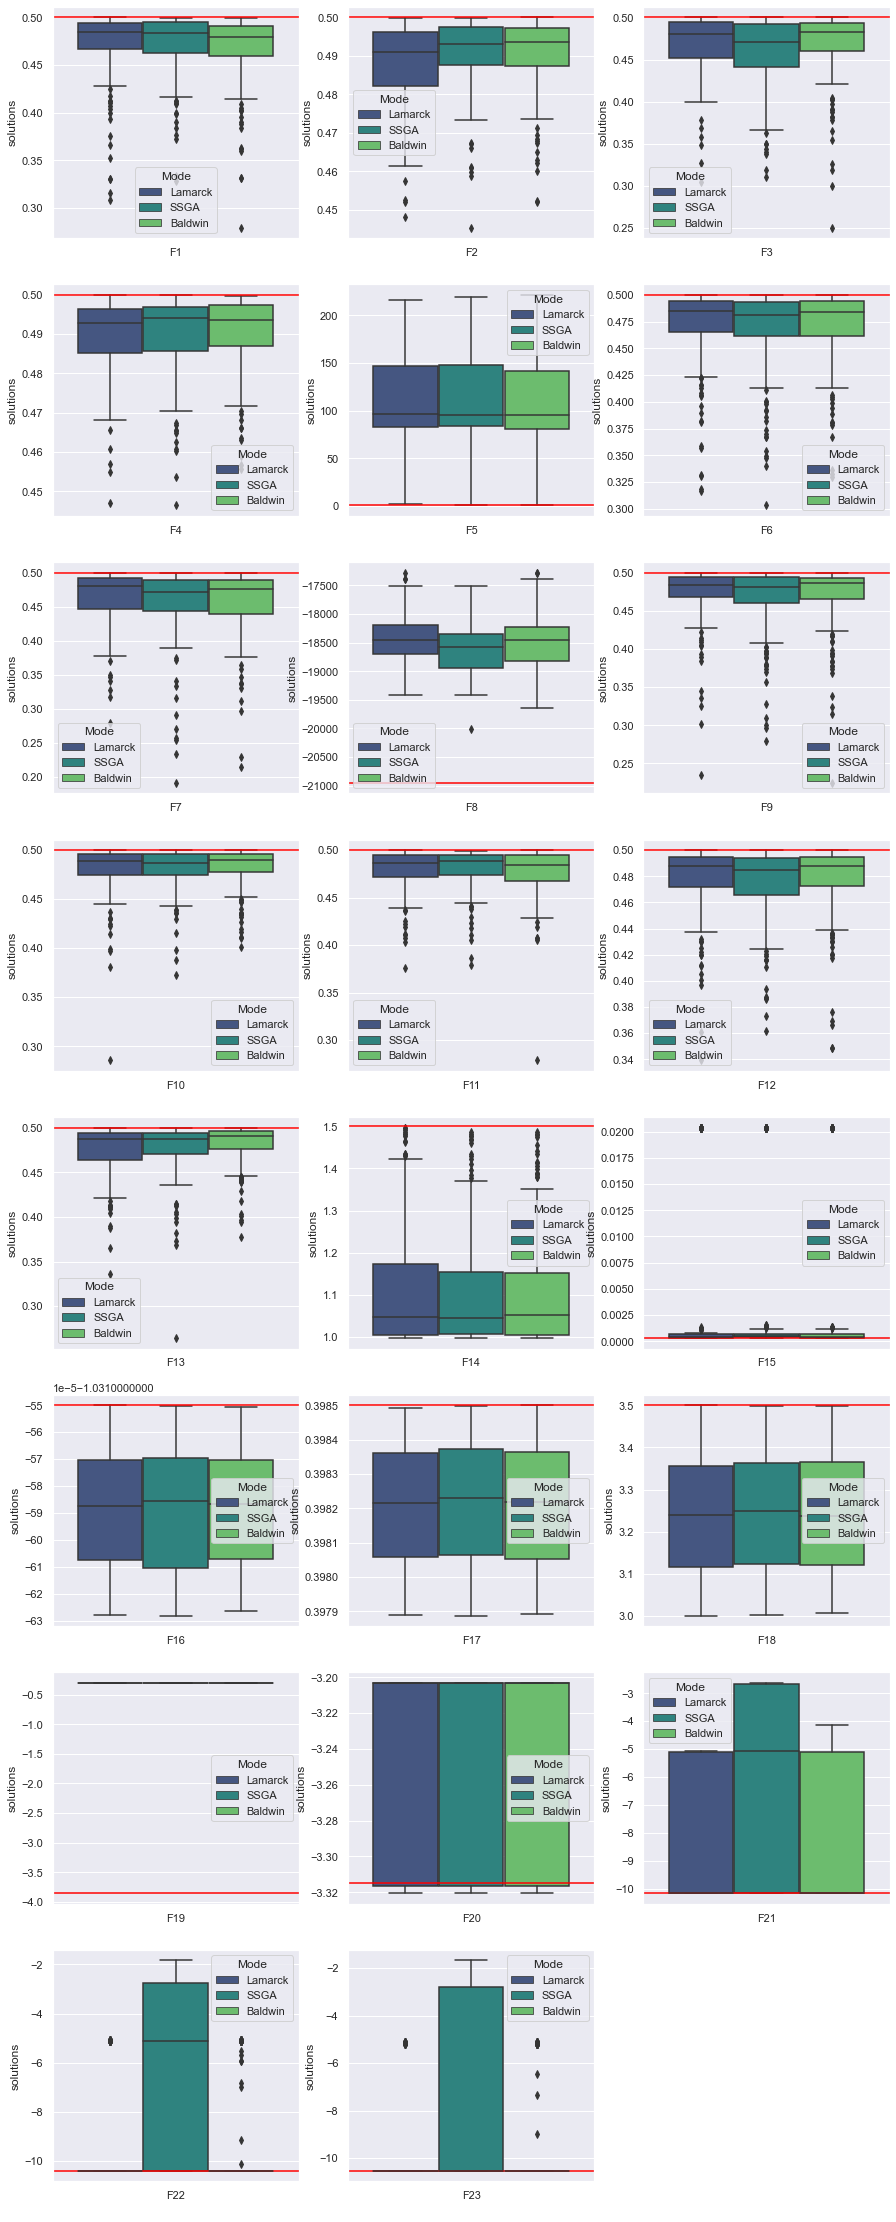

In [10]:
def show_graph(dataframe):
    sns.set()
    dist_cols = 3
    dist_rows = 8
    plt.figure(figsize=(5 * dist_cols, 5 * dist_rows))
    i = 1
    for function in function_list:
        dataf = dataframe[dataframe["Function"] == function]
        dataf2 = cdf[cdf["Function"] == function]
        plt.subplot(dist_rows, dist_cols, i)
        sns.boxplot(data=dataf, y="solutions", x="Function",hue="Mode",palette="viridis")
        # sns.scatterplot(data=dataf2,y="optimal",x="Function",color ="red")
        plt.axhline(y=global_opt[i-1],color="red")
        plt.xlabel(" ")
        plt.ylabel("solutions")
        i = i + 1
    plt.savefig("./together_solutions_optimal_{0}.pdf".format("lamarck_SSGA_Baldwin"), dpi=1200)
    plt.show()
show_graph(dataframe=dataframe)